Show how the cell plot looks like.
In the image, red and yellow are cells inected and green pixels represent healthy cells.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plotFrame(run,t):
    CELL_H  = 0
    CELL_H_rt = 1
    CELL_H_p = 2
    CELL_H_rtp = 3
    
    CELL_D  = 4
    
    CELL_A1 = 84
    CELL_A2 = 21
    
    mycmap = {
        CELL_H: [0, 255, 0],
        CELL_D: [0, 0, 0],
        CELL_A1: [255, 0, 0],
        CELL_A2: [255, 255, 0],
        CELL_H_rt: [127, 127, 127],
        CELL_H_p: [127, 127, 127],
        CELL_H_rtp:[127, 127, 127]
    }
    
   
    
    load_path="run"+str(run)+".npz"
    
    picture = np.load(load_path)['arr_0']
    picture0 = picture[t]
    # Create a 800x800x3 array of 8 bit unsigned integers
    data = np.zeros((802,802,3), dtype=np.uint8)
    # Convert picture array to image
    for row in range(0, len(data)):
        for col in range(0, len(data)):
            data[row][col] = mycmap[picture0[row][col]]
    im = plt.imshow(data)
    colors = {k:im.cmap(im.norm(k)) for k in names.keys()}
    # create a patch (proxy artist) for every color 
    patches = [mpatches.Patch(color=list(map(lambda x : x / 255, mycmap[k])), label=names[k]) for k in names.keys()]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0. )
    
    plt.show()

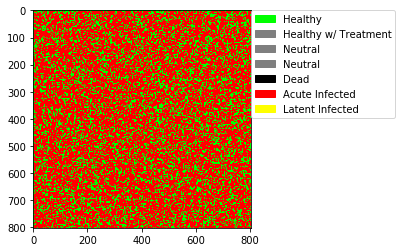

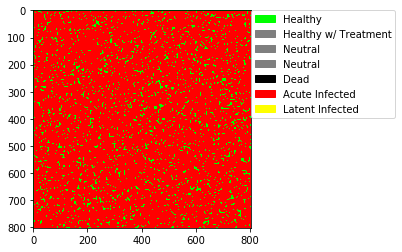

In [7]:


# example of plot
from IPython import display
for i in range(1,3):
    plotFrame(1,i)


Because of the time limit, I only generate 30 data sets for this scenerio. I have some additional data sets for other senerio (different P_infec, tau).

Find blobs at t=0. It can be changed to t=300 in the next milestone

In [11]:
# extract features
# find blobs at t=0.I might change it to t=300 in the next milestone
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
replications=30
X=[[] for i in range(replications)]
for i in range(replications):
    data_path="run"+str(i+1)+".npz"
    data1=np.load(data_path)['arr_0']
    image_gray = data1[0]

    blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=2, threshold=.15)
    
    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
    
    X[i]+=list([len(blobs_log),np.mean(blobs_log[:,2]),len(blobs_dog),np.mean(blobs_dog[:,2])])

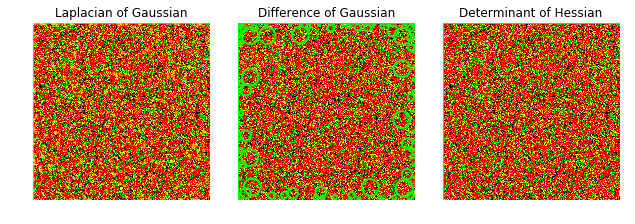

In [71]:
#visualize three different blob methods
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(plotFrame(1, 0))
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
result=pd.read_csv("output.csv")
y=pd.DataFrame(result,columns=["Class [H]","Class [A]","Class [D]"])


In [67]:
#decision tree regressor

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#X, y = load_boston(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=1)

# cross validation score 
cross_val_score(regressor, X, y, cv=10)


C:\Users\octlab\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\octlab\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average')

array([-4.16122662e+02, -7.00134968e-01, -8.75331962e-01, -4.69617722e+03,
       -5.44313098e+03, -8.64585964e-01, -1.54056081e+05, -5.07942098e-01,
       -5.22023379e-01, -5.22414508e-01])

In [59]:
clf=regressor.fit(X,y)

My laptop cannot run GraphViz properly.

In [65]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['H','A','D'], # the target names.
 feature_names=['log blob numbers','average blob radius','doh blob numbers','average doh radius'], # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [66]:
from sklearn.tree.export import export_text
resultTree = export_text(clf,feature_names=['log blob numbers','average blob radius','doh blob numbers','average doh radius'])
print(resultTree)

|--- log blob numbers <= 14851.00
|   |--- log blob numbers <= 14619.00
|   |   |--- value: [0.19, 0.67, 0.14]
|   |--- log blob numbers >  14619.00
|   |   |--- log blob numbers <= 14803.00
|   |   |   |--- average doh radius <= 3.12
|   |   |   |   |--- average doh radius <= 3.04
|   |   |   |   |   |--- value: [0.17, 0.69, 0.14]
|   |   |   |   |--- average doh radius >  3.04
|   |   |   |   |   |--- log blob numbers <= 14653.00
|   |   |   |   |   |   |--- average doh radius <= 3.08
|   |   |   |   |   |   |   |--- value: [0.17, 0.69, 0.14]
|   |   |   |   |   |   |--- average doh radius >  3.08
|   |   |   |   |   |   |   |--- value: [0.17, 0.69, 0.14]
|   |   |   |   |   |--- log blob numbers >  14653.00
|   |   |   |   |   |   |--- log blob numbers <= 14665.00
|   |   |   |   |   |   |   |--- value: [0.17, 0.69, 0.14]
|   |   |   |   |   |   |--- log blob numbers >  14665.00
|   |   |   |   |   |   |   |--- average doh radius <= 3.11
|   |   |   |   |   |   |   |   |--- value: [